### PACKAGES

In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

### LOADING DATA 

In [2]:
# Loading the data
train_dataset = h5py.File("/Users/ChahakJadon/Desktop/anaconda/Machine Learning github/Classification/Logistic Regression/Logistic Regression NN/train_catvnoncat.h5", "r")
test_dataset = h5py.File("/Users/ChahakJadon/Desktop/anaconda/Machine Learning github/Classification/Logistic Regression/Logistic Regression NN/test_catvnoncat.h5", "r")

In [3]:
for key in train_dataset.keys():
    print(key)

list_classes
train_set_x
train_set_y


In [4]:
x_train = np.array(train_dataset["train_set_x"][:]) # your train set features
y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

In [5]:
list_classes = np.array(train_dataset["list_classes"][:])

In [6]:
x_test = np.array(test_dataset["test_set_x"][:]) # your test set features
y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

In [7]:
print(x_train.shape, y_train.shape)

(209, 64, 64, 3) (209,)


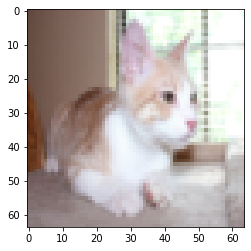

In [8]:
index = 4
plt.imshow(x_test[index])

In [9]:
y_train = y_train.reshape((1, y_train.shape[0]))
print(y_train.shape)
y_test = y_test.reshape((1, y_test.shape[0]))
print(y_test.shape)

(1, 209)
(1, 50)


In [10]:
m_train=x_train.shape[0]
m_test=x_test.shape[0]
num_px=x_train.shape[1]
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64


In [11]:
x_train_flatten=x_train.reshape(x_train.shape[0],-1).T
x_test_flatten=x_test.reshape (x_test.shape[0],-1).T

In [12]:
# normalization

x_train = x_train_flatten / 255.
x_test = x_test_flatten / 255.

print(x_train.shape)
features=x_train.shape[0]
features

(12288, 209)


12288

### 2 LAYER NEURAL NETWORK

In [13]:
n_x = x_train.shape[0]
n_h = 7
n_y = y_train.shape[0]
layer_dims=(n_x, n_h, n_y)
print(n_x, n_y)

12288 1


In [14]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.01, num_iterations = 3000, print_cost=False):
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X, W1, b1, activation="relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation="sigmoid")
        
        # Compute cost
        cost = compute_cost(A2, Y)
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation="sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation="relu")
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6429673956634753
Cost after iteration 200: 0.6139330587122018
Cost after iteration 300: 0.5603909238662337
Cost after iteration 400: 0.5030563524628464
Cost after iteration 500: 0.4698443892342187
Cost after iteration 600: 0.4355621445123246
Cost after iteration 700: 0.4098697797209291
Cost after iteration 800: 0.3703324586925943
Cost after iteration 900: 0.28012549813890314
Cost after iteration 1000: 0.2965487848882419
Cost after iteration 1100: 0.19625387983520975
Cost after iteration 1200: 0.3552933244720867
Cost after iteration 1300: 0.15117073173355397
Cost after iteration 1400: 0.1282205350263975
Cost after iteration 1500: 0.10367329243705371
Cost after iteration 1600: 0.09337081956364972
Cost after iteration 1700: 0.0862691900376488
Cost after iteration 1800: 0.06430869400356981
Cost after iteration 1900: 0.05547815049723392
Cost after iteration 2000: 0.04719098356053284
Cost after iteration 2100: 0.0407888157

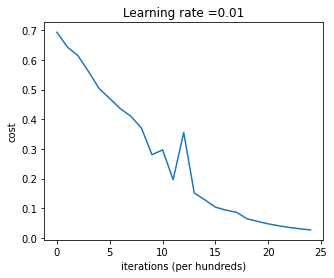

In [15]:
parameters = two_layer_model(x_train, y_train, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

In [16]:
predictions_train = predict(x_train, y_train, parameters)

Accuracy: 0.9999999999999998


In [17]:
predictions_test = predict(x_test, y_test, parameters)

Accuracy: 0.72


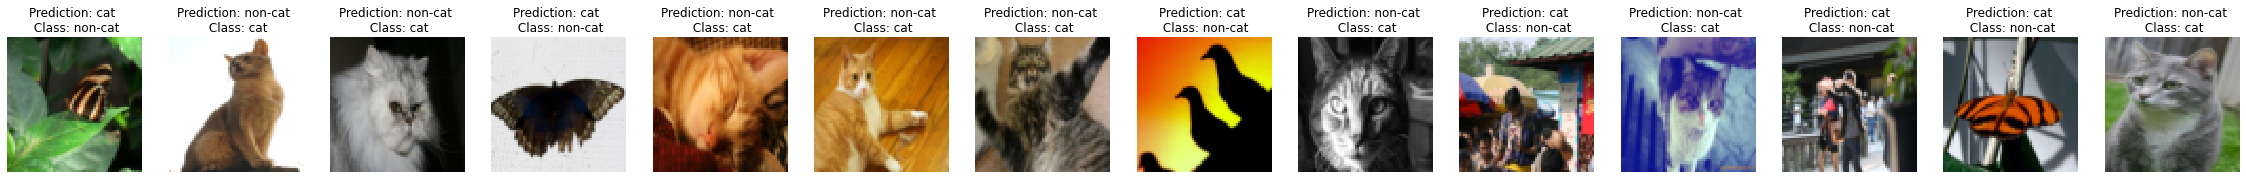

In [25]:
print_mislabeled_images(list_classes, x_test, y_test, predictions_test)

### L layered NN 

In [32]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [33]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    
    np.random.seed(1)
    costs = []                         
    
    # Parameters initialization
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


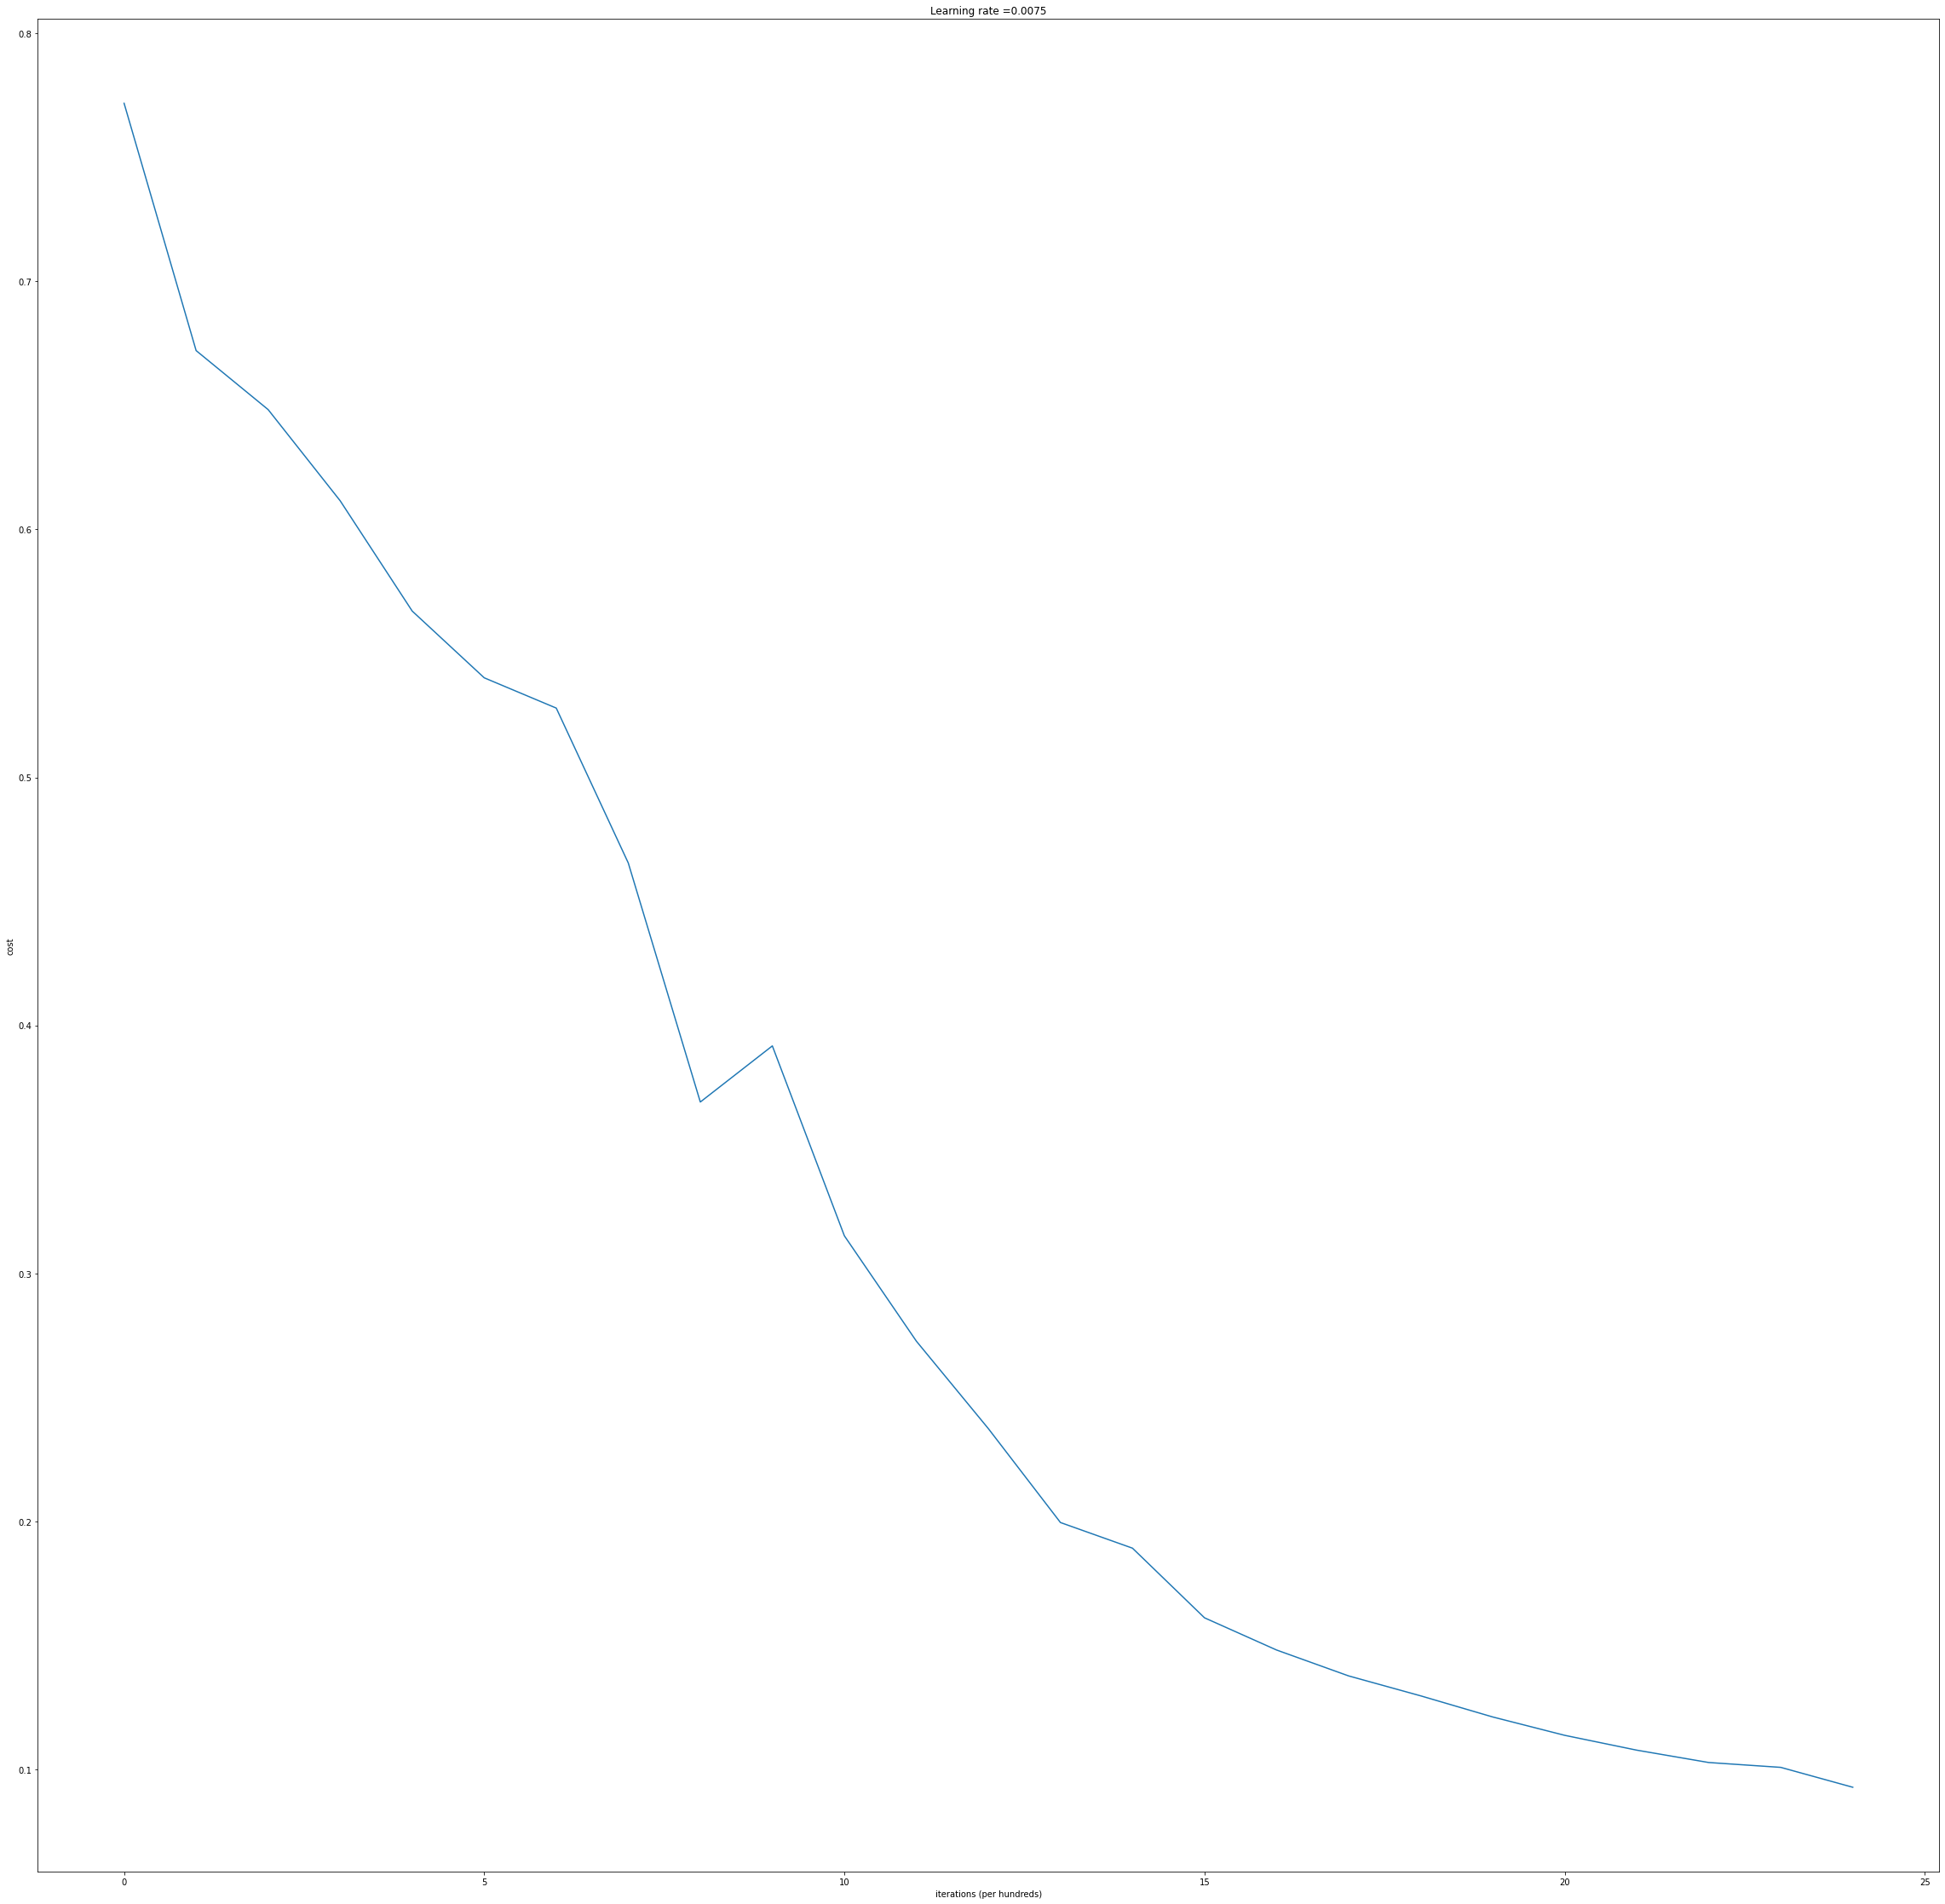

In [34]:
parameters = L_layer_model(x_train, y_train, layers_dims, num_iterations = 2500, print_cost = True)

In [35]:
pred_train = predict(x_train, y_train, parameters)

Accuracy: 0.9856459330143539


In [36]:
pred_test = predict(x_test, y_test, parameters)

Accuracy: 0.8


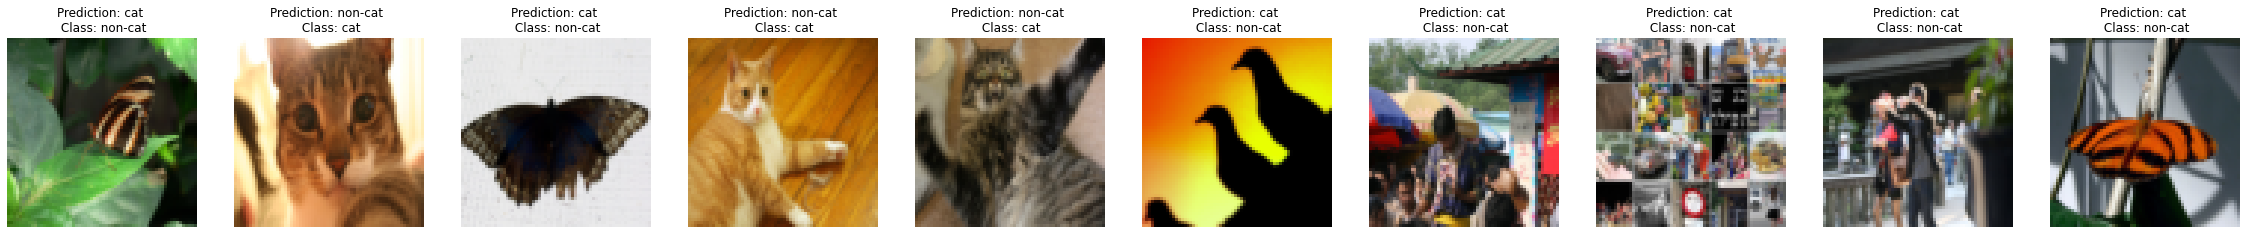

In [37]:
print_mislabeled_images(list_classes, x_test, y_test, pred_test)